In [1]:
from requests import get
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from queue import PriorityQueue as PQ
from geopy import distance
from time import time as t

In [2]:
# Helpers for accessing the NHL API (btw I love you NHL for having an API for us nerds)

teamAbbrev = [i['default'] for i in pd.DataFrame(get('https://api-web.nhle.com/v1/standings/now').json()['standings'])['teamAbbrev']]

def ask(link):
    '''Input: Link (str)
    Output: Json of Info (dict)'''
    return get(link).json()

In [3]:
#Data From ChatGPT

nhl_stadiums = [
    {
        "Team": "Anaheim Ducks",
        "Stadium": "Honda Center",
        "teamAbbrev": "ANA",
        "Longitude": -117.8763,
        "Latitude": 33.8075
    },
    {
        "Team": "Arizona Coyotes",
        "Stadium": "Gila River Arena",
        "teamAbbrev": "ARI",
        "Longitude": -112.1886,
        "Latitude": 33.5317
    },
    {
        "Team": "Boston Bruins",
        "Stadium": "TD Garden",
        "teamAbbrev": "BOS",
        "Longitude": -71.0621,
        "Latitude": 42.3662
    },
    {
        "Team": "Buffalo Sabres",
        "Stadium": "KeyBank Center",
        "teamAbbrev": "BUF",
        "Longitude": -78.8756,
        "Latitude": 42.8750
    },
    {
        "Team": "Calgary Flames",
        "Stadium": "Scotiabank Saddledome",
        "teamAbbrev": "CGY",
        "Longitude": -114.0555,
        "Latitude": 51.0374
    },
    {
        "Team": "Carolina Hurricanes",
        "Stadium": "PNC Arena",
        "teamAbbrev": "CAR",
        "Longitude": -78.7728,
        "Latitude": 35.8033
    },
    {
        "Team": "Chicago Blackhawks",
        "Stadium": "United Center",
        "teamAbbrev": "CHI",
        "Longitude": -87.6742,
        "Latitude": 41.8807
    },
    {
        "Team": "Colorado Avalanche",
        "Stadium": "Ball Arena",
        "teamAbbrev": "COL",
        "Longitude": -105.0070,
        "Latitude": 39.7487
    },
    {
        "Team": "Columbus Blue Jackets",
        "Stadium": "Nationwide Arena",
        "teamAbbrev": "CBJ",
        "Longitude": -83.0466,
        "Latitude": 39.9694
    },
    {
        "Team": "Dallas Stars",
        "Stadium": "American Airlines Center",
        "teamAbbrev": "DAL",
        "Longitude": -96.8104,
        "Latitude": 32.7903
    },
    {
        "Team": "Detroit Red Wings",
        "Stadium": "Little Caesars Arena",
        "teamAbbrev": "DET",
        "Longitude": -83.0552,
        "Latitude": 42.3410
    },
    {
        "Team": "Edmonton Oilers",
        "Stadium": "Rogers Place",
        "teamAbbrev": "EDM",
        "Longitude": -113.5098,
        "Latitude": 53.5461
    },
    {
        "Team": "Florida Panthers",
        "Stadium": "FLA Live Arena",
        "teamAbbrev": "FLA",
        "Longitude": -80.3256,
        "Latitude": 26.1584
    },
    {
        "Team": "Los Angeles Kings",
        "Stadium": "Crypto.com Arena",
        "teamAbbrev": "LAK",
        "Longitude": -118.2673,
        "Latitude": 34.0430
    },
    {
        "Team": "Minnesota Wild",
        "Stadium": "Xcel Energy Center",
        "teamAbbrev": "MIN",
        "Longitude": -93.1012,
        "Latitude": 44.9442
    },
    {
        "Team": "Montréal Canadiens",
        "Stadium": "Bell Centre",
        "teamAbbrev": "MTL",
        "Longitude": -73.5697,
        "Latitude": 45.4961
    },
    {
        "Team": "Nashville Predators",
        "Stadium": "Bridgestone Arena",
        "teamAbbrev": "NSH",
        "Longitude": -86.7776,
        "Latitude": 36.1592
    },
    {
        "Team": "New Jersey Devils",
        "Stadium": "Prudential Center",
        "teamAbbrev": "NJD",
        "Longitude": -74.1745,
        "Latitude": 40.7337
    },
    {
        "Team": "New York Islanders",
        "Stadium": "UBS Arena",
        "teamAbbrev": "NYI",
        "Longitude": -73.8726,
        "Latitude": 40.7181
    },
    {
        "Team": "New York Rangers",
        "Stadium": "Madison Square Garden",
        "teamAbbrev": "NYR",
        "Longitude": -73.9933,
        "Latitude": 40.7505
    },
    {
        "Team": "Ottawa Senators",
        "Stadium": "Canadian Tire Centre",
        "teamAbbrev": "OTT",
        "Longitude": -75.9252,
        "Latitude": 45.2968
    },
    {
        "Team": "Philadelphia Flyers",
        "Stadium": "Wells Fargo Center",
        "teamAbbrev": "PHI",
        "Longitude": -75.1719,
        "Latitude": 39.9012
    },
    {
        "Team": "Pittsburgh Penguins",
        "Stadium": "PPG Paints Arena",
        "teamAbbrev": "PIT",
        "Longitude": -79.9898,
        "Latitude": 40.4394
    },
    {
        "Team": "San Jose Sharks",
        "Stadium": "SAP Center at San Jose",
        "teamAbbrev": "SJS",
        "Longitude": -121.9018,
        "Latitude": 37.3328
    },
    {
        "Team": "Seattle Kraken",
        "Stadium": "Climate Pledge Arena",
        "teamAbbrev": "SEA",
        "Longitude": -122.3549,
        "Latitude": 47.6205
    },
    {
        "Team": "St. Louis Blues",
        "Stadium": "Enterprise Center",
        "teamAbbrev": "STL",
        "Longitude": -90.2028,
        "Latitude": 38.6268
    },
    {
        "Team": "Tampa Bay Lightning",
        "Stadium": "Amalie Arena",
        "teamAbbrev": "TBL",
        "Longitude": -82.5333,
        "Latitude": 27.9428
    },
    {
        "Team": "Toronto Maple Leafs",
        "Stadium": "Scotiabank Arena",
        "teamAbbrev": "TOR",
        "Longitude": -79.3832,
        "Latitude": 43.6435
    },
    {    "Team": "Vancouver Canucks",
    "Stadium": "Rogers Arena",
    "teamAbbrev": "VAN",
    "Longitude": -123.1107,
    "Latitude": 49.2778
},
{
    "Team": "Vegas Golden Knights",
    "Stadium": "T-Mobile Arena",
    "teamAbbrev": "VGK",
    "Longitude": -115.1713,
    "Latitude": 36.1020
},
{
    "Team": "Washington Capitals",
    "Stadium": "Capital One Arena",
    "teamAbbrev": "WSH",
    "Longitude": -77.0209,
    "Latitude": 38.8981
},
{
    "Team": "Winnipeg Jets",
    "Stadium": "Canada Life Centre",
    "teamAbbrev": "WPG",
    "Longitude": -97.1517,
    "Latitude": 49.8925
}
]

In [4]:
# Get all games from the 2023-24 NHL Season
allGames = pd.concat([pd.DataFrame(ask(f'https://api-web.nhle.com/v1/club-schedule-season/{team}/now')['games']) for team in teamAbbrev]).drop_duplicates('id')

In [5]:
teamId = {row['abbrev']:row['id'] for row in allGames['awayTeam']}

In [6]:
teamToId = lambda team: teamId[team]

In [7]:
stadiums = pd.DataFrame(nhl_stadiums).set_index('teamAbbrev')

In [8]:
ref = pd.DataFrame(nhl_stadiums)

In [9]:
stadiums['Longitude'] *= -1

In [10]:
def dist(team1, team2):
    if (team1 is None) or (team2 is None):
        return 0
    loc1 = stadiums.loc[team1]
    loc2 = stadiums.loc[team2]
    coord1 = (loc1['Latitude'], loc1['Longitude'])
    coord2 = (loc2['Latitude'], loc2['Longitude'])
    return distance.distance(coord1, coord2).miles

In [11]:
def randomTeam(*notThis):
    '''Returns a random team but not teams listed'''
    return np.random.choice([i for i in teamAbbrev if i not in notThis])

In [12]:
data = []
for loc1 in range(32):
    for loc2 in range(loc1+1, 32):
        location1 = ref.iloc[loc1]['teamAbbrev']
        location2 = ref.iloc[loc2]['teamAbbrev']
        data += [{'From': location1,
                 'To': location2,
                 'Distance': dist(location1, location2)}]

In [13]:
ref = pd.DataFrame(data)

In [14]:
ref['Distance'].median()

1145.4993022852711

In [15]:
ref.sort_values('Distance')

,From,To,Distance
405,NYI,NYR,6.718270
392,NJD,NYR,9.580209
391,NJD,NYI,15.884794
12,ANA,LAK,27.715274
113,BUF,TOR,58.909640
...,...,...,...
482,TBL,VAN,2596.936061
71,BOS,LAK,2597.870474
81,BOS,SJS,2685.340019
317,FLA,SEA,2710.576434


In [16]:
class Game:
    def __init__(self, home, away):
        self.home = home
        self.away = away
        self.teams = (home, away)
        self.marked = False
        self.hash = 100*teamToId(away) + teamToId(home)
    
    def mark(self, date):
        self.date = date
        self.hash += 100000*(date.day+(100*date.month)+(10000*date.year)) + 10000
        self.marked = True
        
    def homeT(self, team):
        return self.home == team
    
    def awayT(self, team):
        return self.away == team
        
    def involves(self, team):
        return (self.home == team) or (self.away == team)
    
    def __repr__(self):
        return f'{self.away} @ {self.home}'
    
    def __eq__(self, other):
        if not isinstance(other, Game):
            return False
        return self.hash%100000 == other.hash%100000
    
    def __lt__(self, other):
        if not isinstance(other, Game):
            return False
        return self.hash < other.hash
    
    def __gt__(self, other):
        if not isinstance(other, Game):
            return False
        return self.hash > other.hash
    
    def copy(self):
        newGame = Game(self.home, self.away)
        if self.marked:
            newGame.mark(self.date)
        return newGame
    
    def opponent(self, team):
        if team == self.home:
            return self.away
        if team == self.away:
            return self.home
        return None

    
class Team:
    def __init__(self, name):
        self.name = name
        self.lastGameDate = dt.datetime.min
        self.lastGameLocation = name
        self.homeStand = 0
        self.roadTrip = 0
        self.gamesRemaining = 82
        self.gameStreak = 0
        
    def __repr__(self):
        return self.name
    
    def copy(self):
        newTeam = Team(self.name)
        newTeam.lastGameDate = self.lastGameDate
        newTeam.lastGameLocation = self.lastGameLocation
        newTeam.homeStand = self.homeStand
        newTeam.roadTrip = self.roadTrip
        newTeam.gamesRemaining = self.gamesRemaining
        newTeam.gameStreak = self.gameStreak
        return newTeam
    
    def schedule(self, game):
        assert self.lastGameDate <= game.date
        distance = dist(self.lastGameLocation, game.home)
        daysBetween = 3 - min([(game.date - self.lastGameDate).days-1,3])
        cost = distance ** (1+(.1*daysBetween))
        self.lastGameDate = game.date
        self.lastGameLocation = game.home
        self.gamesRemaining -= 1
        return cost
    
    def scheduleHome(self, game):
        self.homeStand += 1
        self.roadTrip = 0
        return self.schedule(game)
        
    def scheduleAway(self, game):
        self.roadTrip += 1
        self.homeStand = 0
        return self.schedule(game)
    
    def advanceDay(self, date):
        if self.lastGameDate == date:
            self.gameStreak += 1
            return 1
        self.gameStreak = 0
        return 0
    
    def valid(self, game, scheduledGames, date):
        '''Check which potential games we can schedule that day based on the following criteria:
        1. The team can't play twice in a day
        2. The team can't play the same team three times within a week
        3. Team cannot play a back-to-back-to-back
        4. Teams cannot play more than three games in a seven day span
        5. Team cannot have a home stand for more than five games
        6. Team cannot have a road trip for more than five games
        7. Team cannot play the same matchup in a back-to-back'''
        # Can't play twice in a day
        #print(date)
        if date == self.lastGameDate:
            #print('INVALID: Already played today')
            return False
        opponent = game.opponent(self.name)
        scheduledGames = [x for x in scheduledGames if x.involves(self.name)]
        withinWeek = [scheduledGame.opponent(self.name) == opponent for scheduledGame in scheduledGames if (date - scheduledGame.date).days <=7]
        # Don't want the same matchup three times in a week
        if sum(withinWeek) >= 2:
            #print('INVALID: Same matchup 3 times in a week')
            return False
        # Don't want three games in a row
        withinDays = [scheduledGame for scheduledGame in scheduledGames if (date - scheduledGame.date).days <= 2]
        if len(withinDays) >= 2:
            #print('INVALID: 3 Games in a Row')
            return False
        # Don't want more than three games in a five day span
        withinDays = [scheduledGame for scheduledGame in scheduledGames if (date - scheduledGame.date).days <= 7]
        if len(withinDays) >= 3:
            #print('INVALID: Playing more than 3 games in a 7 day span')
            return False
        # Don't want a home stand extending past 5 games
        if game.homeT(self.name) and (self.homeStand >= 5):
            #print('INVALID: Homestand over 5 games')
            return False
        # Don't want a road trip extending past 5 games
        if game.awayT(self.name) and (self.roadTrip >= 5):
            #print('INVALID: Road Trip over 5 games')
            return False
        # If no games scheduled forego the back-to-back check
        if len(scheduledGames) == 0:
            return True
        # Make sure there isn't the same matchup back-to-back
        recentGame = max(scheduledGames)
        return not ((recentGame.home == game.home) and (recentGame.away == game.away))


class Schedule:
    def __init__(self, toSchedule, scheduled, sznEnd, date, teamObj, mandatory_offs = []):
        self.scheduled_games = scheduled
        self.unscheduled_games = toSchedule
        self.date = date
        self.sznEnd = sznEnd
        self.teams = teamObj
        self.cost = 0
        self.mandatory_offdays = mandatory_offs
    
    def copy(self):
        teamCopy = {i: self.teams[i].copy() for i in self.teams.keys()}
        unsched = [i.copy() for i in self.unscheduled_games]
        sched = [i.copy() for i in self.scheduled_games]
        newSched = Schedule(unsched, sched, self.sznEnd, self.date, teamCopy, self.mandatory_offdays)
        newSched.cost = self.cost
        return newSched
        
    def markGame(self, game):
        '''Returns the cost of marking'''
        for gameToSchedule in self.unscheduled_games:
            if gameToSchedule == game:
                gameToSchedule.mark(self.date)
                break
        self.scheduled_games += [gameToSchedule]
        cost1 = self.teams[game.home].scheduleHome(gameToSchedule)
        cost2 = self.teams[game.away].scheduleAway(gameToSchedule)
        self.unscheduled_games = [i for i in self.unscheduled_games if not i.marked]
        return cost1 + cost2
    
    def heuristic(self):
        locations = {team:{self.teams[team].lastGameLocation} for team in teamAbbrev}
        for game in self.unscheduled_games:
            for team in game.teams:
                locations[team] = locations[team] | {game.home}
        h = 0
        for game in self.unscheduled_games:
            h += min([dist(i, game.home) for i in locations[game.home]])
            h += min([dist(i, game.home) for i in locations[game.away]])
        return h
        
    def advanceDay(self):
        totalGames = 0
        for team in self.teams.values():
            totalGames += team.advanceDay(self.date)
        self.date += dt.timedelta(days = 1)
        return totalGames
        
    def getSuccessor(self, action):
        '''Returns successor state and the cost of it'''
        successor = self.copy()
        cost = 0
        if action == 'ADVANCE DAY':
            totalGames = successor.advanceDay()
            cost = 1500**(1-(.1*totalGames))
        elif action == 'ADVANCE DAY WITH NO PENALTY':
            successor.advanceDay()
        else:
            cost += successor.markGame(action)
        successor.cost += cost
        return successor
        
    def getLegalActions(self):
        # During Christmas break, schedule no games
        if self.date in self.mandatory_offdays:
            return ['ADVANCE DAY WITH NO PENALTY']
        # If we skip to the point where a 3 in a row needs to be played, terminate the season
        daysLeft = (self.sznEnd - self.date).days
        for team in self.teams.values():
            if daysLeft < ((2*team.gamesRemaining)/3):
                return []
        bothValid = lambda x: self.teams[x.home].valid(x, self.scheduled_games, self.date) and self.teams[x.away].valid(x, self.scheduled_games, self.date)
        validGames = [x for x in self.unscheduled_games if bothValid(x)]
        validGames += ['ADVANCE DAY']
        return validGames
    
    def isGoalState(self):
        #print(self.unscheduled_games)
        return len(self.unscheduled_games) == 0
    
    def __eq__(self, other):
        if not isinstance(other, Schedule):
            return False
        if len(self.unscheduled_games) != len(other.unscheduled_games):
            return False
        if self.date != other.date:
            return False
        for myGame in self.unscheduled_games:
            if myGame not in other.unscheduled_games:
                return False
        return True
    
    def __lt__(self,other):
        if not isinstance(other, Schedule):
            return False
        return len(self.unscheduled_games) == len(other.unscheduled_games)

In [17]:
gameToObj = lambda x: Game(x['homeTeam']['abbrev'], x['awayTeam']['abbrev'])

In [18]:
def runSearch(gamesToSchedule, startDate = dt.datetime(2023,10,10), endDate = dt.datetime(2024,4,18), allowedDays = None):
    '''Input: 
    gamesToSchedule- list of Game objects to schedule
    startDate- datetime object of the startDate (default = 10/10/2023)
    end date- datetime object of the endDate (default = 4/18/2024)
    allowedDays- allowedDays (default = None), overrides endDate
    Output: Schedule object with optimal ordering'''
    if allowedDays is not None:
        endDate = startDate + dt.timedelta(days = allowedDays-1)
    # Initialize Priority Queue and Team objects
    order = PQ()
    def makeTeam(abbrev):
        tm = Team(abbrev)
        tm.gamesRemaining = sum([game.involves(abbrev) for game in gamesToSchedule])
        return tm
    teams = {team : makeTeam(team) for team in teamAbbrev}
    #Add initial state
    initial_state = Schedule(gamesToSchedule, [], endDate, startDate, teams)
    order.put((0,initial_state))
    visited = []
    while not order.empty():
        state = order.get()[1]
        if state in visited:
            continue
        visited += [state]
        #print(f'Scheduled: {state.scheduled_games}')
        #print(f"Game Streak: {state.teams['CAR'].gameStreak}")
        if state.isGoalState():
            print('Found Solution')
            return state
        legalActions = state.getLegalActions()
        #print(f'Actions: {legalActions}')
        for action in legalActions:
            successor= state.getSuccessor(action)
            #print(successor.scheduled_games)
            p = successor.cost + successor.heuristic()
            #print(action, p)
            order.put((p, successor))
    return 'No Solution'

In [19]:
def timeRandom(n):
    randomGames = list(allGames.sample(n = n).apply(gameToObj, axis = 1))
    t1 = t()
    sol = runSearch(randomGames)
    return sol, t() - t1

In [20]:
x, y, solutions = [], [], []

In [21]:
for n in range(1,8):
    for rep in range(30):
        x += [n]
        sol = timeRandom(n)
        y += [sol[1]]
        solutions += [sol[0]]

Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solution
Found Solu

In [22]:
timeData = pd.DataFrame({'n': x, 'n^2':[i**2 for i in x], 'Time (sec)': y})#.groupby('n').mean()

In [23]:
from sklearn.linear_model import LinearRegression as linreg

In [24]:
model = linreg(fit_intercept = False)

In [25]:
model.fit(X = timeData[['n', 'n^2']], y = timeData['Time (sec)'])

LinearRegression(fit_intercept=False)

/Users/gordonliangstud/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Search Algorithm Runs on Exponential Time')

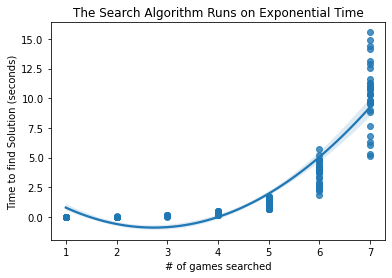

In [26]:
sns.regplot(x,y, order = 2)
# xs = np.linspace(1,7,1000)
# plt.plot(xs, model.predict([[i,i**2]for i in xs]))
plt.xlabel('# of games searched')
plt.ylabel('Time to find Solution (seconds)')
plt.title('The Search Algorithm Runs on Exponential Time')

In [27]:
model.predict([[1312, 1312**2]])

/Users/gordonliangstud/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([627540.05561792])

In [28]:
# Around 25 days to search for the optimal NHL schedule
2172488.62849779/60/60/24

25.144544311317016

In [29]:
model = linreg(fit_intercept = False)
model.fit(X = [[i,i**2] for i in range(1,8)], y = timeData.groupby('n')['Time (sec)'].mean().values)

LinearRegression(fit_intercept=False)

Text(0.5, 1.0, 'The Search Algorithm Runs on Exponential Time')

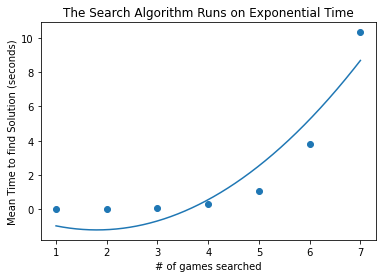

In [30]:
plt.scatter(range(1,8),timeData.groupby('n')['Time (sec)'].mean())
xs = np.linspace(1,7,1000)
plt.plot(xs, model.predict([[i,i**2]for i in xs]))
plt.xlabel('# of games searched')
plt.ylabel('Mean Time to find Solution (seconds)')
plt.title('The Search Algorithm Runs on Exponential Time')

In [31]:
model.predict([[1312, 1312**2]])

array([627540.05561792])

In [32]:
# Around 25 days to search for the optimal NHL schedule
2172488.62849779/60/60/24

25.144544311317016

# Test Cases

In [33]:
# Three games in 2 days should be None
runSearch([Game('CAR', 'PHI'), Game('CAR', 'NYR'), Game('NYI', 'CAR')], allowedDays = 2)

'No Solution'

In [34]:
# Three games in 3 days should also be None
runSearch([Game('CAR', 'PHI'), Game('CAR', 'NYR'), Game('NYI', 'CAR')], allowedDays = 3)

'No Solution'

In [35]:
# Three games in 4 days should work
runSearch([Game('CAR', 'PHI'), Game('CAR', 'NYR'), Game('NYI', 'CAR')], allowedDays = 4)

'No Solution'

In [36]:
# Four games in 7 days shouldn't work
runSearch([Game('CAR', 'PHI'), Game('CAR', 'NYR'), Game('NYI', 'CAR'), Game('ARI', 'CAR')], allowedDays = 7)

'No Solution'

In [37]:
# More than 5 home games in a row shouldn't work
runSearch([Game('CAR',randomTeam('CAR')) for i in range(6)], allowedDays = 14)

'No Solution'

In [38]:
# More than 5 away games in a row shouldn't work
runSearch([Game(randomTeam('CAR'), 'CAR') for i in range(6)], allowedDays = 14)

'No Solution'

In [39]:
# 6 Games in 14 days should work
tstGames = [Game(randomTeam('CAR'), 'CAR') for i in range(3)] + [Game('CAR', randomTeam('CAR')) for i in range(3)]
print(tstGames)
sched = runSearch(tstGames, allowedDays = 14)
for i in sched.scheduled_games:
    print(f'{i}:{i.date}')

[CAR @ SJS, CAR @ FLA, CAR @ NSH, NYI @ CAR, PHI @ CAR, WPG @ CAR]
Found Solution
NYI @ CAR:2023-10-10 00:00:00
PHI @ CAR:2023-10-11 00:00:00
WPG @ CAR:2023-10-13 00:00:00
CAR @ FLA:2023-10-18 00:00:00
CAR @ SJS:2023-10-21 00:00:00
CAR @ NSH:2023-10-22 00:00:00


In [40]:
# No back to back same matchups
runSearch([Game('CAR', 'NYR'), Game('CAR', 'NYR')], allowedDays = 3)

'No Solution'